# Imports

In [1]:
import numpy as pd 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Acquire

In [2]:
#Bring in csv using pandas
df= pd.read_csv('samsung_health.csv')

In [3]:
# Looking at data types and amount of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5777 entries, 0 to 5776
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   heart_rate   5777 non-null   int64 
 1   max          5777 non-null   int64 
 2   start_time   5777 non-null   object
 3   end_time     5777 non-null   object
 4   create_time  5777 non-null   object
 5   update_time  5777 non-null   object
 6   min          5777 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 316.1+ KB


In [4]:
df.isnull().sum() # verify number null values in each column

heart_rate     0
max            0
start_time     0
end_time       0
create_time    0
update_time    0
min            0
dtype: int64

In [5]:
#Looking at shape ( # of rows and columns)
df.shape

(5777, 7)

In [6]:
#Looking at first 10 values
df.head(10)

,heart_rate,max,start_time,end_time,create_time,update_time,min
0,74,74,"06/14/2021, 3:30:59 PM","06/14/2021, 3:30:59 PM","06/14/2021, 3:30:59 PM","06/14/2021, 3:30:59 PM",74
1,62,79,"06/14/2021, 4:10:59 PM","06/14/2021, 4:10:59 PM","06/14/2021, 4:10:59 PM","06/14/2021, 4:10:59 PM",62
2,68,79,"06/14/2021, 4:50:59 PM","06/14/2021, 4:50:59 PM","06/14/2021, 4:50:59 PM","06/14/2021, 4:50:59 PM",62
3,75,79,"06/14/2021, 5:10:59 PM","06/14/2021, 5:10:59 PM","06/14/2021, 5:10:59 PM","06/14/2021, 5:10:59 PM",62
4,69,79,"06/14/2021, 5:00:59 PM","06/14/2021, 5:00:59 PM","06/14/2021, 5:00:59 PM","06/14/2021, 5:00:59 PM",62
5,69,108,"06/14/2021, 6:10:59 PM","06/14/2021, 6:10:59 PM","06/14/2021, 6:10:59 PM","06/14/2021, 6:10:59 PM",62
6,68,79,"06/14/2021, 4:20:59 PM","06/14/2021, 4:20:59 PM","06/14/2021, 4:20:59 PM","06/14/2021, 4:20:59 PM",62
7,69,108,"06/14/2021, 5:50:59 PM","06/14/2021, 5:50:59 PM","06/14/2021, 5:50:59 PM","06/14/2021, 5:50:59 PM",62
8,79,79,"06/14/2021, 3:50:59 PM","06/14/2021, 3:50:59 PM","06/14/2021, 3:50:59 PM","06/14/2021, 3:50:59 PM",74
9,65,79,"06/14/2021, 4:00:59 PM","06/14/2021, 4:00:59 PM","06/14/2021, 4:00:59 PM","06/14/2021, 4:00:59 PM",65


# Takeways:
- No null values present
- decide whether to change datatypes of start_time, end_time, create_time, and update_time

# Prepare

In [8]:
# Change times to datetime format
df[['start_time','end_time', 'update_time']] = df[['start_time','end_time', 'update_time']].apply(pd.to_datetime)

In [9]:
# Verify datatype was changed for start time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5777 entries, 0 to 5776
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   heart_rate   5777 non-null   int64         
 1   max          5777 non-null   int64         
 2   start_time   5777 non-null   datetime64[ns]
 3   end_time     5777 non-null   datetime64[ns]
 4   create_time  5777 non-null   object        
 5   update_time  5777 non-null   datetime64[ns]
 6   min          5777 non-null   int64         
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 316.1+ KB


In [28]:
df[df['start_time'] != df['end_time']]

,heart_rate,max,start_time,end_time,create_time,update_time,min,month,day,weekday
33,80,115,2021-06-14 19:00:00,2021-06-14 19:59:31,"06/14/2021, 7:59:31 PM",2021-06-14 19:59:31,79,6,6,Monday
34,93,121,2021-06-14 20:00:00,2021-06-14 20:22:29,"06/14/2021, 8:22:29 PM",2021-06-14 20:22:29,72,6,6,Monday
35,58,142,2021-06-14 22:00:00,2021-06-14 22:59:43,"06/14/2021, 10:59:43 PM",2021-06-15 15:13:47,52,6,6,Monday
36,55,83,2021-06-14 23:00:00,2021-06-14 23:59:43,"06/14/2021, 11:59:43 PM",2021-06-14 23:59:43,53,6,6,Monday
37,68,92,2021-06-15 00:00:00,2021-06-15 00:59:42,"06/15/2021, 12:59:42 AM",2021-06-15 00:59:42,51,6,6,Tuesday
...,...,...,...,...,...,...,...,...,...,...
5742,74,116,2021-08-22 18:00:00,2021-08-22 18:59:52,"08/22/2021, 6:59:52 PM",2021-08-22 18:59:52,67,8,8,Sunday
5746,71,98,2021-08-22 19:00:00,2021-08-22 19:59:51,"08/22/2021, 7:59:51 PM",2021-08-22 19:59:51,60,8,8,Sunday
5760,62,92,2021-08-22 20:00:00,2021-08-22 20:59:50,"08/22/2021, 8:59:50 PM",2021-08-22 20:59:50,55,8,8,Sunday
5773,56,96,2021-08-22 21:00:00,2021-08-22 21:59:50,"08/22/2021, 9:59:50 PM",2021-08-22 21:59:50,49,8,8,Sunday


- ignore these data points for now.

In [10]:
#Look at first 10 values
df.head(10)

,heart_rate,max,start_time,end_time,create_time,update_time,min
0,74,74,2021-06-14 15:30:59,2021-06-14 15:30:59,"06/14/2021, 3:30:59 PM",2021-06-14 15:30:59,74
1,62,79,2021-06-14 16:10:59,2021-06-14 16:10:59,"06/14/2021, 4:10:59 PM",2021-06-14 16:10:59,62
2,68,79,2021-06-14 16:50:59,2021-06-14 16:50:59,"06/14/2021, 4:50:59 PM",2021-06-14 16:50:59,62
3,75,79,2021-06-14 17:10:59,2021-06-14 17:10:59,"06/14/2021, 5:10:59 PM",2021-06-14 17:10:59,62
4,69,79,2021-06-14 17:00:59,2021-06-14 17:00:59,"06/14/2021, 5:00:59 PM",2021-06-14 17:00:59,62
5,69,108,2021-06-14 18:10:59,2021-06-14 18:10:59,"06/14/2021, 6:10:59 PM",2021-06-14 18:10:59,62
6,68,79,2021-06-14 16:20:59,2021-06-14 16:20:59,"06/14/2021, 4:20:59 PM",2021-06-14 16:20:59,62
7,69,108,2021-06-14 17:50:59,2021-06-14 17:50:59,"06/14/2021, 5:50:59 PM",2021-06-14 17:50:59,62
8,79,79,2021-06-14 15:50:59,2021-06-14 15:50:59,"06/14/2021, 3:50:59 PM",2021-06-14 15:50:59,74
9,65,79,2021-06-14 16:00:59,2021-06-14 16:00:59,"06/14/2021, 4:00:59 PM",2021-06-14 16:00:59,65


In [11]:
#Create new columns using .dt accessor 
df['month'] = df.start_time.dt.month
df['day'] = df.start_time.dt.month
df['weekday'] = df.start_time.dt.day_name()
df.head(10)

,heart_rate,max,start_time,end_time,create_time,update_time,min,month,day,weekday
0,74,74,2021-06-14 15:30:59,2021-06-14 15:30:59,"06/14/2021, 3:30:59 PM",2021-06-14 15:30:59,74,6,6,Monday
1,62,79,2021-06-14 16:10:59,2021-06-14 16:10:59,"06/14/2021, 4:10:59 PM",2021-06-14 16:10:59,62,6,6,Monday
2,68,79,2021-06-14 16:50:59,2021-06-14 16:50:59,"06/14/2021, 4:50:59 PM",2021-06-14 16:50:59,62,6,6,Monday
3,75,79,2021-06-14 17:10:59,2021-06-14 17:10:59,"06/14/2021, 5:10:59 PM",2021-06-14 17:10:59,62,6,6,Monday
4,69,79,2021-06-14 17:00:59,2021-06-14 17:00:59,"06/14/2021, 5:00:59 PM",2021-06-14 17:00:59,62,6,6,Monday
5,69,108,2021-06-14 18:10:59,2021-06-14 18:10:59,"06/14/2021, 6:10:59 PM",2021-06-14 18:10:59,62,6,6,Monday
6,68,79,2021-06-14 16:20:59,2021-06-14 16:20:59,"06/14/2021, 4:20:59 PM",2021-06-14 16:20:59,62,6,6,Monday
7,69,108,2021-06-14 17:50:59,2021-06-14 17:50:59,"06/14/2021, 5:50:59 PM",2021-06-14 17:50:59,62,6,6,Monday
8,79,79,2021-06-14 15:50:59,2021-06-14 15:50:59,"06/14/2021, 3:50:59 PM",2021-06-14 15:50:59,74,6,6,Monday
9,65,79,2021-06-14 16:00:59,2021-06-14 16:00:59,"06/14/2021, 4:00:59 PM",2021-06-14 16:00:59,65,6,6,Monday


In [12]:
def split(df, target):
    '''
    this function takes in the zillow dataframe
    splits into train, validate and test subsets
    then splits for X (features) and y (target)
    '''
    # split df into 20% test, 80% train_validate
    train_validate, test = train_test_split(df, test_size=0.2, random_state=1234)
    # split train_validate into 30% validate, 70% train
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=1234)
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test


In [13]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test= split(df, 'heart_rate')

In [14]:
train.shape, validate.shape, test.shape

((3234, 10), (1387, 10), (1156, 10))

# Takeways: 
- will need to split data before exploring 
- due this being time series will need to split into train, validate, test, X_train, y_train, etc. in prepare
- will need to create new features, what features to create?- monthly, daily (hourly?)?
- data is from July 2021- August 2021

# Explore

- see if there are any anomalies in start_time, end_time, and update_time

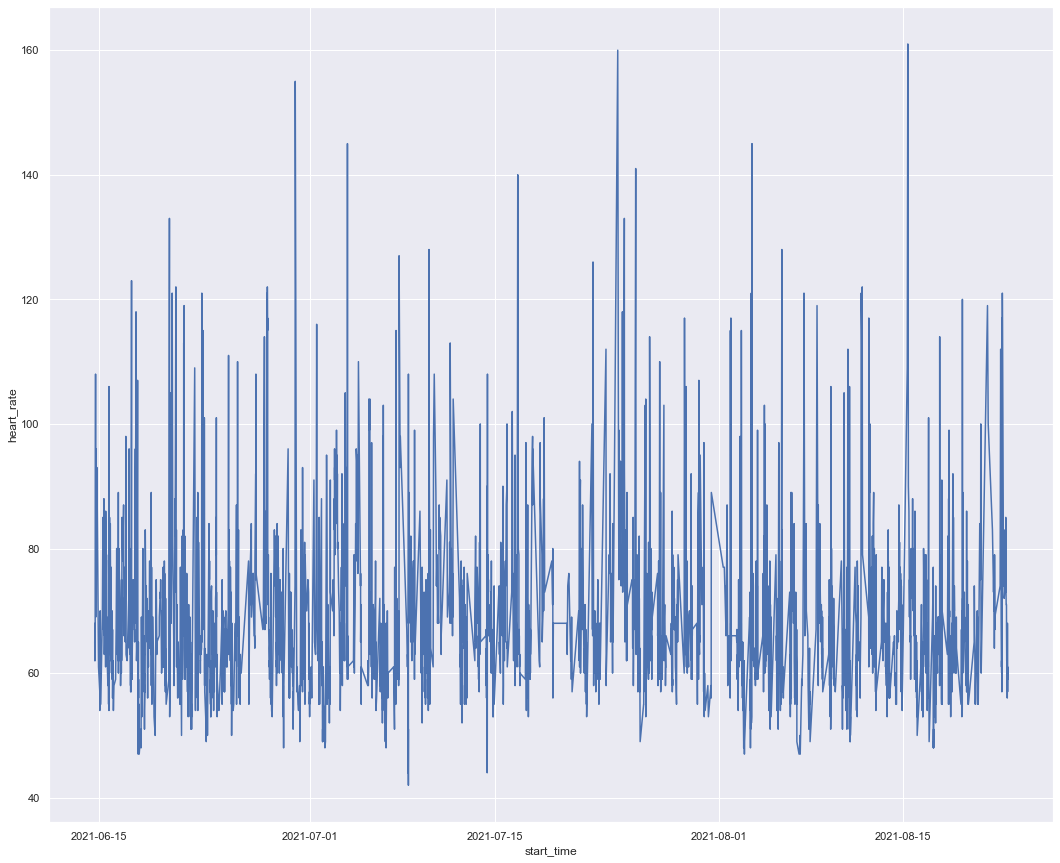

In [23]:
sns.lineplot(x= 'start_time', y= 'heart_rate', data=train)
sns.set(rc={'figure.figsize':(24,18)})

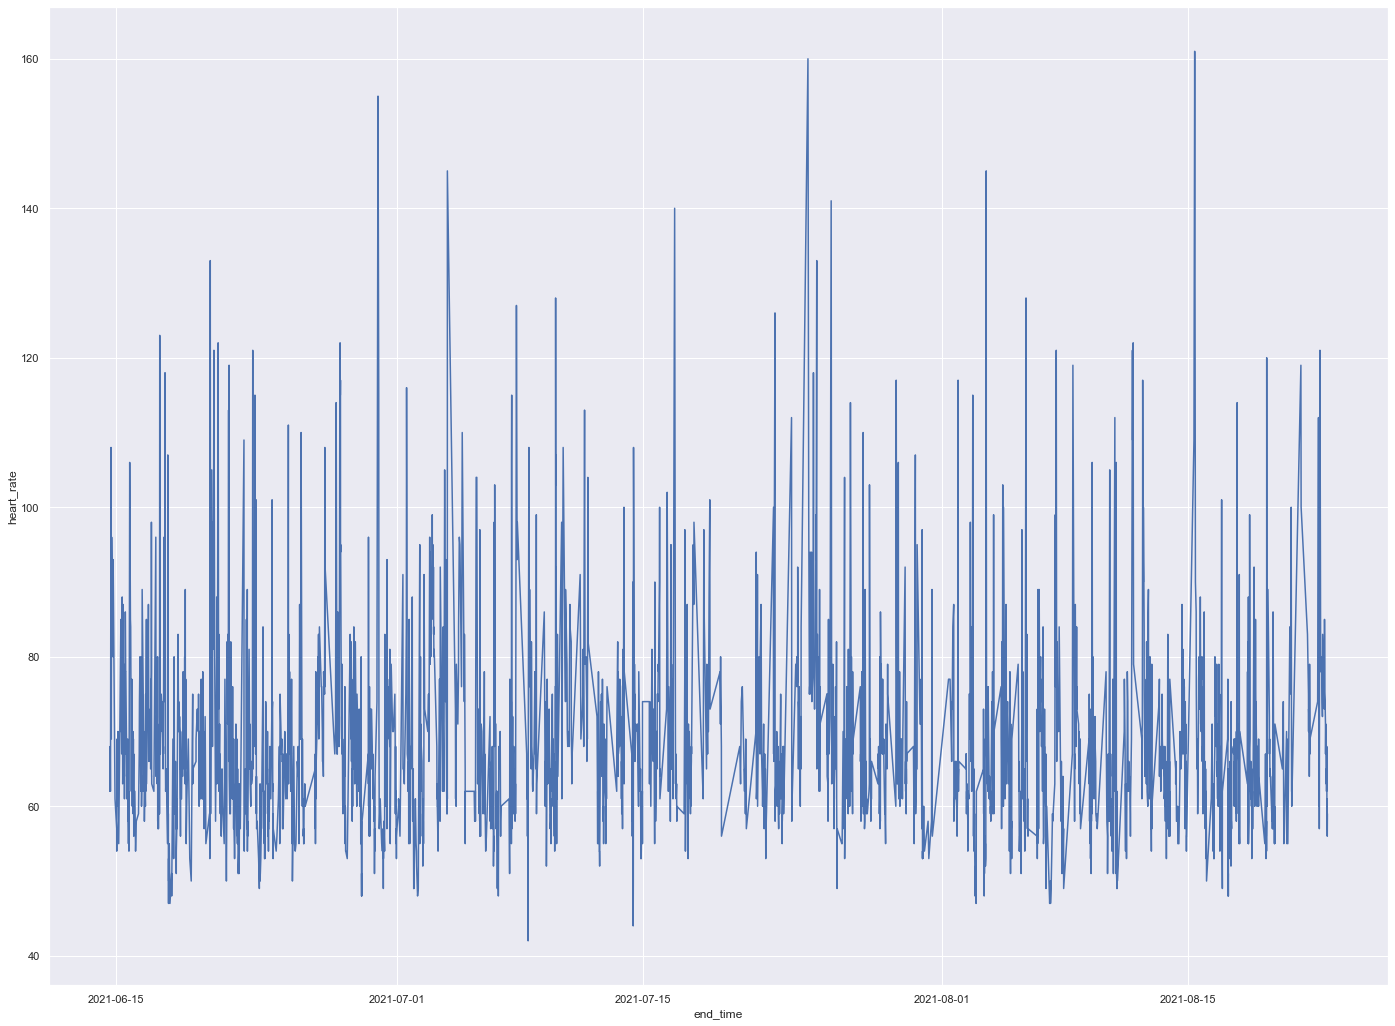

In [24]:
sns.lineplot(x= 'end_time', y= 'heart_rate', data=train)
sns.set(rc={'figure.figsize':(24,18)})

<AxesSubplot:xlabel='update_time', ylabel='heart_rate'>

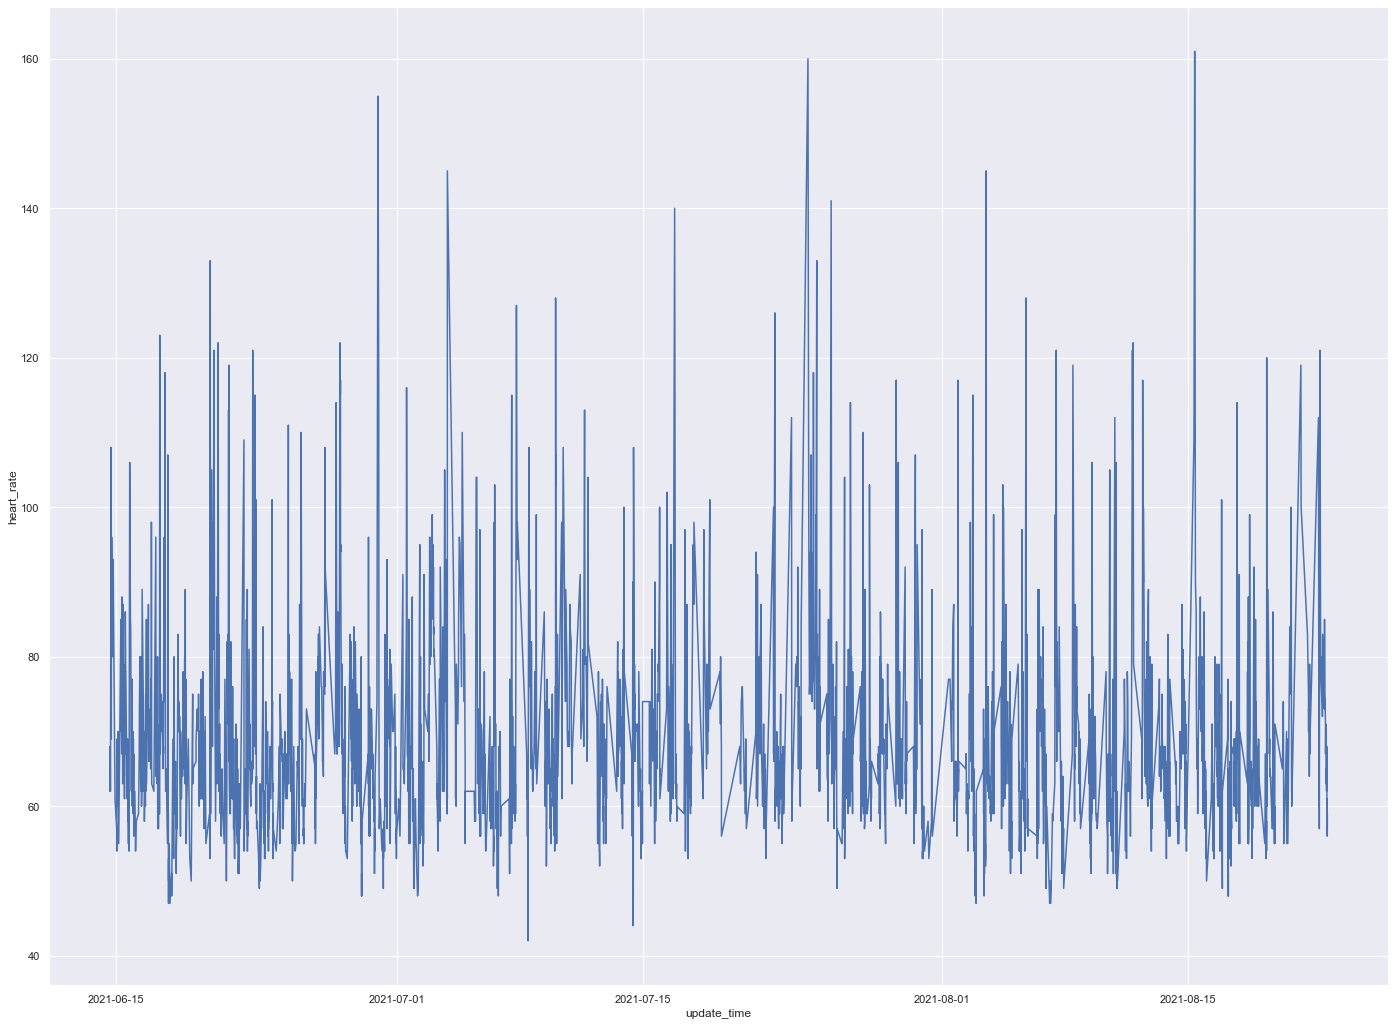

In [25]:
sns.lineplot(x= 'update_time', y= 'heart_rate', data=train)


Takeaways:
- Peaks may be when active and low peaks may be sedentary.